In [1]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import os
os.listdir('C:/Users/aadit/OneDrive/Documents/data analysis learning log/data for projects/Walmart Sales Analysis')

['Walmart Sales Analysis with Geocodes.xlsx', 'Walmart_Final.xlsx']

In [8]:
data = pd.read_excel('C:/Users/aadit/OneDrive/Documents/data analysis learning log/data for projects/Walmart Sales Analysis/Walmart Sales Analysis with Geocodes.xlsx')

In [9]:
summary = data.describe()
print(summary)

              Sales     Quantity       Profit    Ship Time     Latitude  \
count   3203.000000  3203.000000  3203.000000  3203.000000  3187.000000   
mean     226.493266     3.828910    33.849138     3.930066    37.924637   
std      524.876911     2.260947   174.109155     1.806914     5.088241   
min        0.990000     1.000000 -3399.980000     0.000000    31.545500   
25%       19.440000     2.000000     3.850000     3.000000    34.052234   
50%       60.840000     3.000000    11.170000     4.000000    37.338740   
75%      215.810000     5.000000    33.000000     5.000000    39.739236   
max    13999.960000    14.000000  6719.980000     7.000000    48.751911   

         Longitude  
count  3187.000000  
mean   -118.336834  
std       4.803923  
min    -123.086754  
25%    -122.332071  
50%    -118.243685  
75%    -117.375494  
max    -103.205227  


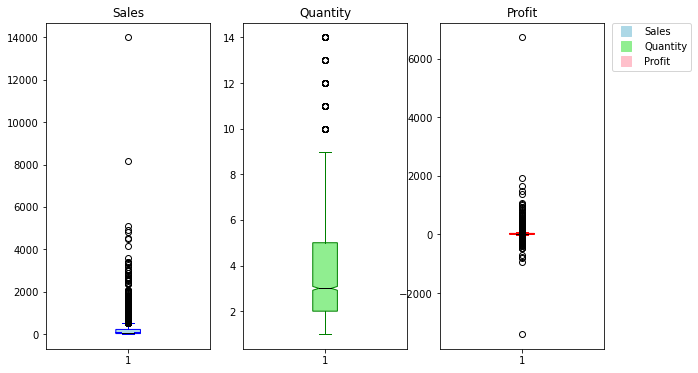

In [10]:
# create box and whisker plots
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
bplot1 = axs[0].boxplot(data['Sales'], patch_artist=True, notch=True,
                         boxprops=dict(facecolor='lightblue', color='blue'),
                         whiskerprops=dict(color='blue'),
                         capprops=dict(color='blue'),
                         medianprops=dict(color='black'))
axs[0].set_title('Sales')

bplot2 = axs[1].boxplot(data['Quantity'], patch_artist=True, notch=True,
                         boxprops=dict(facecolor='lightgreen', color='green'),
                         whiskerprops=dict(color='green'),
                         capprops=dict(color='green'),
                         medianprops=dict(color='black'))
axs[1].set_title('Quantity')

bplot3 = axs[2].boxplot(data['Profit'], patch_artist=True, notch=True,
                         boxprops=dict(facecolor='pink', color='red'),
                         whiskerprops=dict(color='red'),
                         capprops=dict(color='red'),
                         medianprops=dict(color='black'))
axs[2].set_title('Profit')

# add legend for the colors
colors = ['lightblue', 'lightgreen', 'pink']
labels = ['Sales', 'Quantity', 'Profit']
patches = [plt.plot([], [], marker="s", ms=10, ls="", mec=None, color=colors[i],
            label="{:s}".format(labels[i]))[0]  for i in range(len(colors))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()



Sales: The mean sales value is 226.49 and the standard deviation is high which means that sales data is widely dispersed. The minimum sales value is 0.99 and the maximum sales value is 13,999.96.

Quantity: The average quantity sold per order is 3.83 and the standard deviation is 2.26. The minimum quantity sold is 1 and the maximum quantity sold is 14.

Profit: The mean profit per order is 33.85 and the standard deviation is high which means that profit data is widely dispersed. The minimum profit is -3,399.98 and the maximum profit is 6,719.98.

We can also observe that the median values are smaller than the mean values for all three variables, indicating that the distributions are right-skewed. Additionally, the interquartile range (IQR) for sales and profit is relatively large, indicating a wide spread of data.

# Trend Analysis

In [11]:
# Create a new column 'Order Month' to extract the month from 'Order Date Formated'
data['Order Month'] = data['Order_Date'].dt.strftime('%Y-%m')

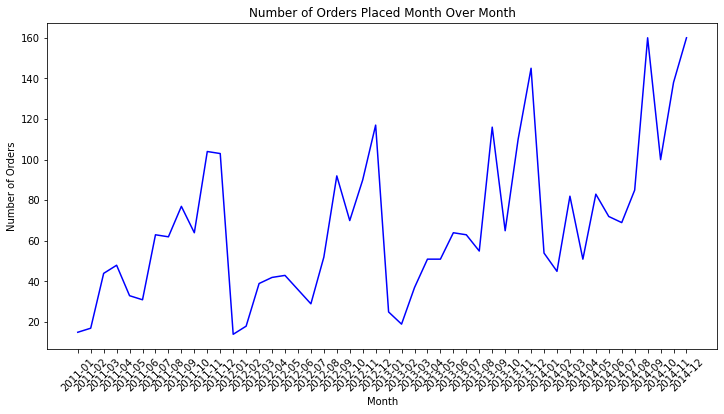

In [12]:
## Convert 'Order Date Formated' to datetime format
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Create a new column 'Order Month' to extract the month from 'Order Date Formated'
data['Order Month'] = data['Order_Date'].dt.strftime('%Y-%m')

# Group the data by 'Order Month' and count the number of orders in each month
monthly_orders = data.groupby('Order Month')['Order ID'].count()

# Plot the line chart showing how many orders were placed month over month
plt.figure(figsize=(12,6))
plt.plot(monthly_orders.index, monthly_orders.values, color='blue')
plt.title('Number of Orders Placed Month Over Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

One interesting trend that can be observed from the plot is the sharp increase in the number of orders placed during the Thanksgiving and Black Friday events. This indicates that these events are significant drivers of sales and could be leveraged by the company to increase revenue in future years. Additionally, the overall trend of increasing orders over time indicates the company is growing and attracting more customers. This information can be used to inform marketing and business strategies to continue this growth trend.

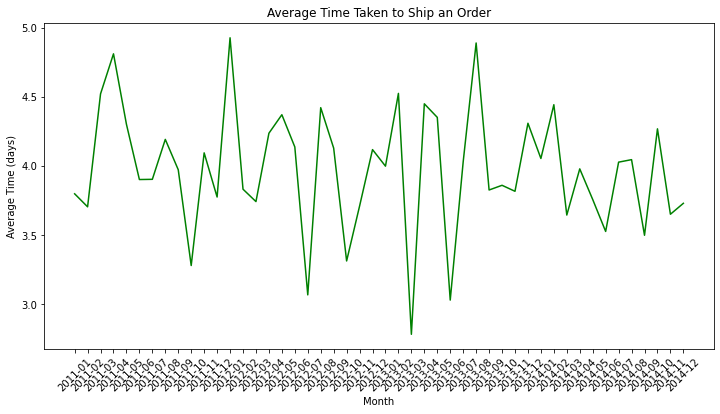

In [13]:
#Convert date columns to datetime format
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Ship_Date'] = pd.to_datetime(data['Ship_Date'])

# Calculate the time taken to ship an order
data['Ship Time'] = (data['Ship_Date'] - data['Order_Date']).dt.days

# Create a new column 'Order Month' to extract the month from 'Order Date Formated'
data['Order Month'] = data['Order_Date'].dt.strftime('%Y-%m')

# Group the data by 'Order Month' and calculate the average ship time for each month
monthly_avg_ship_time = data.groupby('Order Month')['Ship Time'].mean()

# Plot the line chart showing the average ship time month over month
plt.figure(figsize=(12,6))
plt.plot(monthly_avg_ship_time.index, monthly_avg_ship_time.values, color='green')
plt.title('Average Time Taken to Ship an Order')
plt.xlabel('Month')
plt.ylabel('Average Time (days)')
plt.xticks(rotation=45)
plt.show()

This plot is interesting because it provides insights into the company's shipping efficiency. By tracking the average time taken to ship an order, the company can identify areas where it can improve its shipping process and reduce the delivery time. We can see whenever the order quantity is more shipping time is increasing

# Product Analysis

In [15]:
# Group the data by 'Category' and count the number of orders for each category
category_orders = data.groupby('Category')['Order ID'].count()

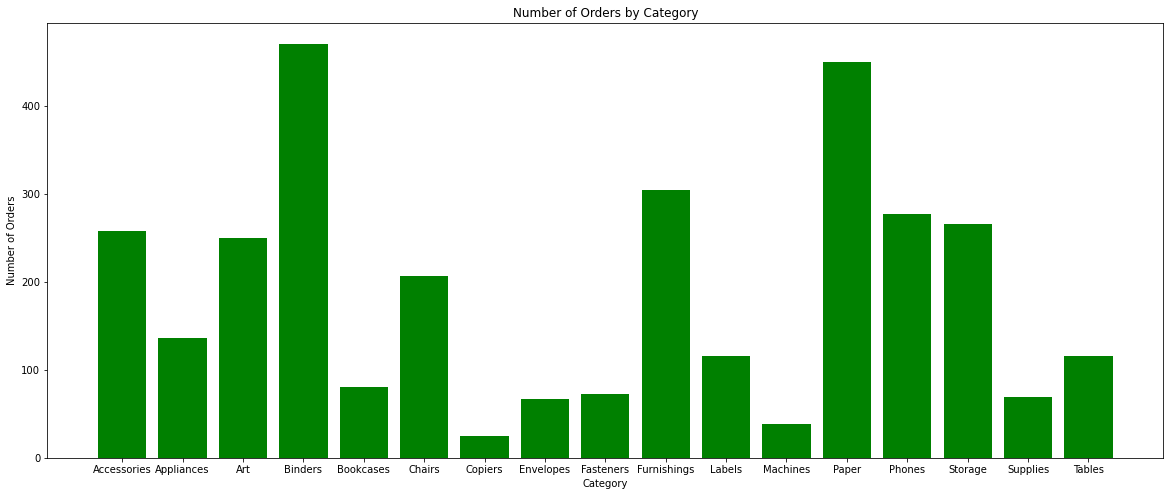

In [16]:
# Plot a bar chart showing the number of orders by category
plt.figure(figsize=(20,8))
plt.bar(category_orders.index, category_orders.values, color='green')
plt.title('Number of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.show()

In [17]:
# Group the data by 'Product Name' and count the number of orders for each product
product_orders = data.groupby('Product Name')['Order ID'].count().sort_values(ascending=False)[:20]

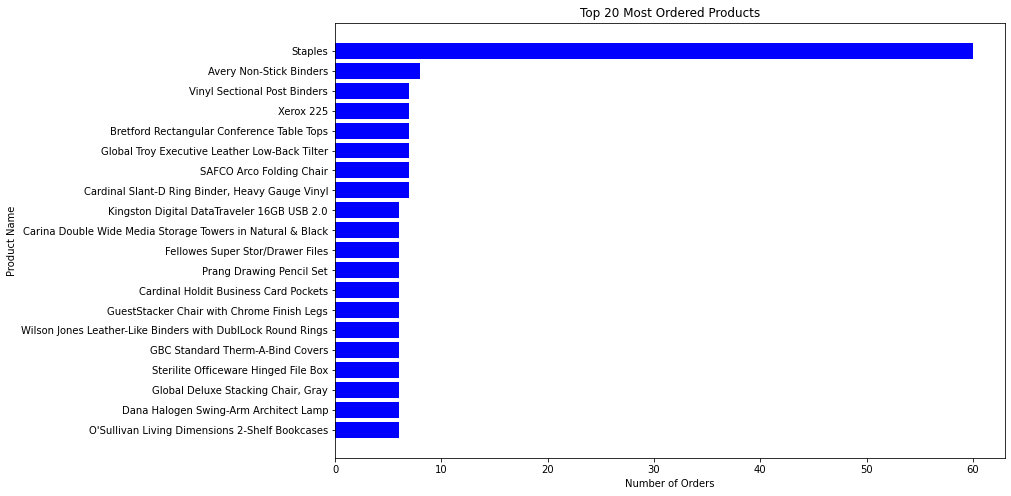

In [18]:
# Plot a horizontal bar chart showing the top 20 most ordered products
plt.figure(figsize=(12,8))
plt.barh(product_orders.index, product_orders.values, color='blue')
plt.gca().invert_yaxis()
plt.title('Top 20 Most Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()

# customer Analysis

In [20]:
# Group the data by 'Customer Name' and count the number of orders, total sales, and total profits for each customer
customer_orders = data.groupby('Customer Name').agg({'Order ID': 'count', 'Sales': 'sum', 'Profit': 'sum'})

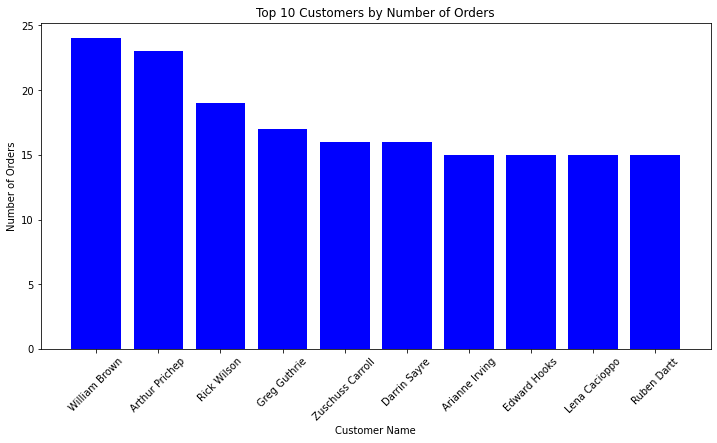

In [21]:
# Find the top 10 customers by number of orders
top_10_customers_by_orders = customer_orders.sort_values(by='Order ID', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_10_customers_by_orders.index, top_10_customers_by_orders['Order ID'], color='blue')
plt.title('Top 10 Customers by Number of Orders')
plt.xlabel('Customer Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

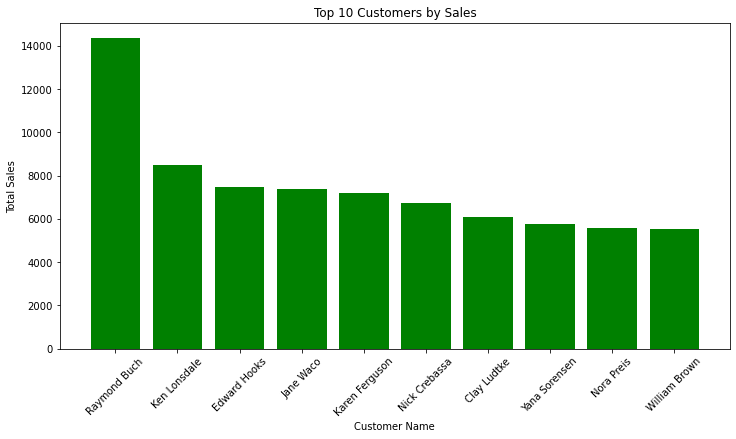

In [22]:
# Find the top 10 customers by sales
top_10_customers_by_sales = customer_orders.sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_10_customers_by_sales.index, top_10_customers_by_sales['Sales'], color='green')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

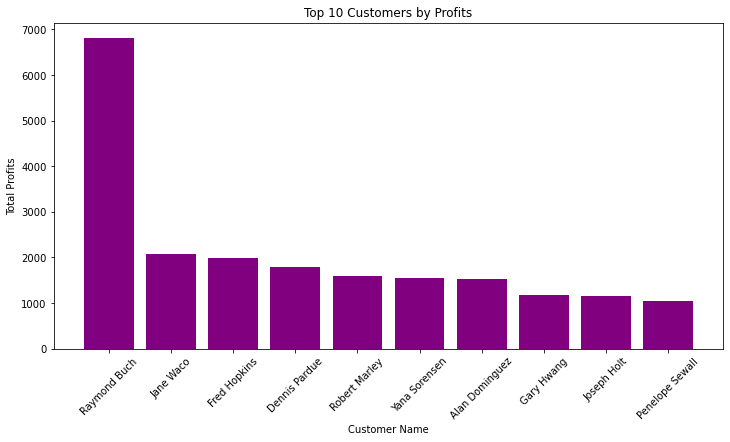

In [23]:
# Find the top 10 customers by profits
top_10_customers_by_profits = customer_orders.sort_values(by='Profit', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_10_customers_by_profits.index, top_10_customers_by_profits['Profit'], color='purple')
plt.title('Top 10 Customers by Profits')
plt.xlabel('Customer Name')
plt.ylabel('Total Profits')
plt.xticks(rotation=45)
plt.show()

This analysis is important because it provides insights into the behavior and value of individual customers to the business. By identifying the top customers in terms of orders, sales, and profits, the business can focus on retaining and growing these high-value customers, as well as identifying areas for improvement with lower-value customers. The visual representation in the form of bar charts allows for quick and easy comparison of the top customers in each category, highlighting any overlap or discrepancies between the different metrics. This information can be used to inform marketing, sales, and customer service strategies to better serve the needs and preferences of the top customers and improve overall business performance.